### Comparison of Law School vs Masters Degrees in STEM

This workbook plots salary vs indebtedness for Law School (JD programs) and MS programs in STEM fields (Engineering, Computer Science, Math).

The division is remarkably clean - it is very unusual for a MS degree recipient in STEM to have a debt level that exceeds first year income, whereas it is very unusual for a JD grad to have a first year income that exceeds debt level.

There are a number or possible reasons for much lower debt levels among STEM graduate students. Based on my personal experience in a STEM program and conversations with other grads, I can think of the following factors. It would be interesting to collect more data on how extensive these factors are:

* STEM MS programs tend to be shorter in duration, 1-2 years.
* STEM MS students tend to be valued as teaching or research assistants, who often qualify for stipends and tuition reduction.
* STEM MS students are often part time students sponsored by corporations who pay their tuition.
* STEM graduates from reputable undergraduate programs may not need a graduate degree to be employable at high salaries with good growth opportunities. As a result, they may simply refuse to attend very expensive programs that don't provide comparable value (a notable exception may international students who benefit from an MS or PhD when seeking a work visa in the US). 
* STEM graduates have a more quantitiative mindset and are more likely to consider debt to salary ratios.



In [1]:
import pandas as pd
import numpy as np
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('data/Most-Recent-Cohorts-Field-of-Study.csv')

In [4]:
df_top = pysqldf("""
SELECT 
    CIPCODE,
    INSTNM, 
    CIPDESC,
    CREDDESC,
    CREDLEV,
    EARN_COUNT_WNE_HI_1YR * 1 AS COHORT_SIZE,
    EARN_MDN_HI_1YR * 1.0 AS EARN_MED_1YR,
    EARN_MDN_HI_2YR * 1.0 AS EARN_MED_2YR,
    DEBT_ALL_STGP_EVAL_MDN * 1.0 AS DEBT_MED,
    (DEBT_ALL_STGP_EVAL_MDN * 1.0) / (EARN_MDN_HI_1YR * 1.0) AS DEBT_RATIO
FROM 
    df 
WHERE
    CREDLEV >= 5
AND
    EARN_MED_1YR * 1.0 > 0
AND
    DEBT_MED * 1.0 > 0
AND 
    COHORT_SIZE > 0
ORDER BY EARN_MED_1YR
""")

In [5]:
#pysqldf("SELECT DISTINCT CIPCODE, CIPDESC FROM df_top")

In [6]:
df_top_sector = pysqldf("""
SELECT DISTINCT 
    *,
    CASE 
        WHEN CIPCODE LIKE '51%' THEN 'Health'
        WHEN CIPCODE LIKE '60%' THEN 'Health'
        WHEN CIPCODE LIKE '52%' THEN 'Business'
        WHEN CIPCODE LIKE '22%' THEN 'Law'
        WHEN CIPCODE LIKE '11%' THEN 'STEM'
        WHEN CIPCODE LIKE '14%' THEN 'STEM'
        WHEN CIPCODE LIKE '27%' THEN 'STEM'
    ELSE
        'Other'
    END AS SECTOR
FROM df_top
WHERE SECTOR IN ('Law', 'STEM') 
""")

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

### Plot 1st year starting salary and debt level for Law JD vs STEM MS degrees. 

Dot size represents the size of the graduating cohort. 

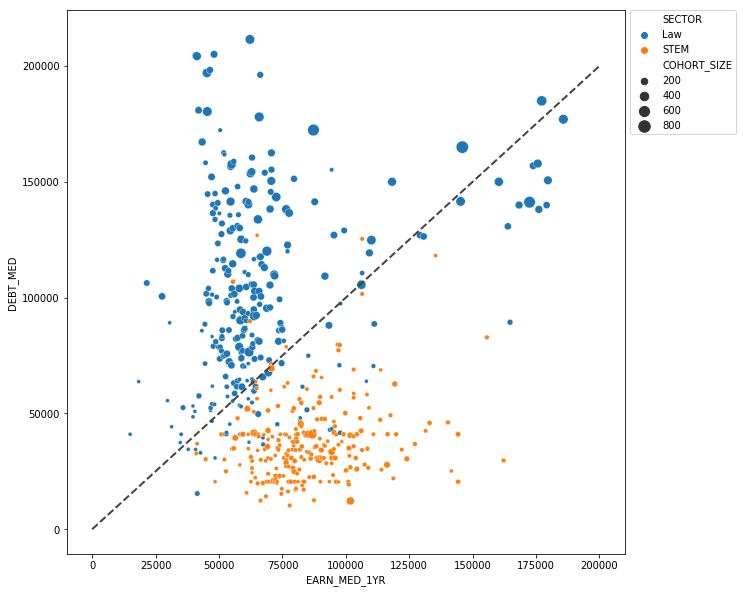

In [8]:
plt.figure(figsize=(10,10))
plt.plot([0,200000],[0,200000], lw=2, color='#414242', linestyle='dashed')
sns.scatterplot(data=df_top_sector, x="EARN_MED_1YR", y="DEBT_MED", hue="SECTOR", size="COHORT_SIZE", sizes = (15,150))
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

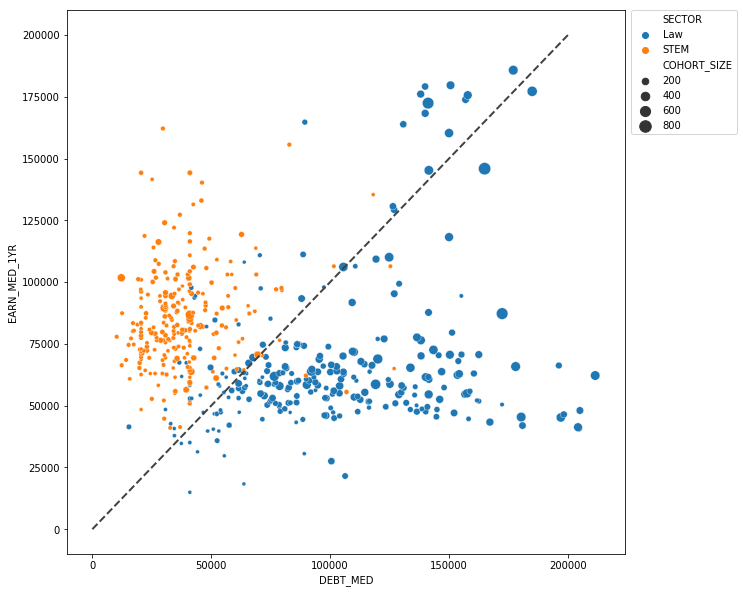

In [17]:
plt.figure(figsize=(10,10))
plt.plot([0,200000],[0,200000], lw=2, color='#414242', linestyle='dashed')
sns.scatterplot(data=df_top_sector, y="EARN_MED_1YR", x="DEBT_MED", hue="SECTOR", size="COHORT_SIZE", sizes = (15,150))
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [22]:
pysqldf("SELECT * FROM df_top_sector WHERE SECTOR = 'STEM' ORDER BY DEBT_RATIO DESC")

,CIPCODE,INSTNM,CIPDESC,CREDDESC,CREDLEV,COHORT_SIZE,EARN_MED_1YR,EARN_MED_2YR,DEBT_MED,DEBT_RATIO,SECTOR
0,1108,Carnegie Mellon University,Computer Software and Media Applications.,Master's Degree,5,18,64990.0,64990.0,126889.0,1.952439,STEM
1,1108,New York University,Computer Software and Media Applications.,Master's Degree,5,75,55512.0,61144.0,106873.0,1.925223,STEM
2,1108,Academy of Art University,Computer Software and Media Applications.,Master's Degree,5,63,62154.0,88417.0,89841.0,1.445458,STEM
3,1110,Capella University,Computer/Information Technology Administration and Management.,Doctoral Degree,6,41,106421.0,111435.0,125328.0,1.177662,STEM
4,1405,Duke University,Biomedical/Medical Engineering.,Master's Degree,5,18,76460.0,77213.0,78751.0,1.029963,STEM
5,1101,Nova Southeastern University,"Computer and Information Sciences, General.",Master's Degree,5,44,70456.0,66329.0,71301.0,1.011993,STEM
6,1405,University of Pennsylvania,Biomedical/Medical Engineering.,Master's Degree,5,15,64493.0,57318.0,63718.0,0.987983,STEM
7,1104,Strayer University-District of Columbia,Information Science/Studies.,Master's Degree,5,220,70628.0,71255.0,69466.0,0.983548,STEM
8,1104,Strayer University-Virginia,Information Science/Studies.,Master's Degree,5,220,70628.0,71255.0,69466.0,0.983548,STEM
9,1104,Strayer University-Maryland,Information Science/Studies.,Master's Degree,5,220,70628.0,71255.0,69466.0,0.983548,STEM
